# Stock Price Prediction using Forecasting

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Data/BAJFINANCE.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [6]:
## setting df index to date
df.set_index('Date', inplace=True)

## Data Preprocessing

### Checking for Null Values

In [8]:
## checking for null values
df.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [10]:
## checking for null data in Trades
df[df['Trades'].isnull()]

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.50,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.90,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.60,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.10,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.00,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-05-25,BAJFINANCE,EQ,601.20,593.00,619.00,590.00,597.00,595.05,598.98,5391,3.229096e+11,NaN,4100.0,0.7605
2011-05-26,BAJFINANCE,EQ,595.05,593.00,607.40,588.20,597.90,595.40,594.93,3341,1.987653e+11,NaN,2004.0,0.5998
2011-05-27,BAJFINANCE,EQ,595.40,585.00,667.00,585.00,620.00,630.75,627.19,11270,7.068407e+11,NaN,6614.0,0.5869


There's a lot of missing data, almost around 11 years of data. So, we drop the feature.

### Dropping Trades Feature & Some Null Values

In [ ]:
## dropping the Trades features
df.drop(['Trades'], axis=1, inplace=True)

In [14]:
## dropping missing values Deliverable Volume and %Deliverable
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64

### Checking for Duplicate Values

In [21]:
## checking if we have duplicate values
df.duplicated().sum()

np.int64(0)

## Explanatory Data Analysis

In [ ]:
## descriptive statistics
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
count,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4.624000e+03,4.624000e+03,4.624000e+03,4624.000000
mean,1434.467669,1435.420372,1459.435272,1410.286494,1435.364598,1435.227217,1435.540487,5.546513e+05,1.419380e+14,1.419690e+05,0.643712
std,1819.285859,1819.150646,1846.090033,1790.465393,1819.624240,1819.412350,1819.002555,1.876521e+06,5.120671e+14,3.495895e+05,0.233522
min,33.550000,33.600000,34.000000,33.000000,34.000000,34.000000,33.840000,6.000000e+00,2.790000e+07,6.000000e+00,0.057500
25%,221.850000,221.000000,230.750000,216.475000,221.050000,222.375000,223.417500,6.415500e+03,1.310379e+11,4.745750e+03,0.478650
50%,648.500000,648.700000,662.950000,635.975000,647.725000,648.725000,649.970000,1.926450e+04,1.223848e+12,1.381950e+04,0.681950
75%,1905.612500,1910.500000,1933.562500,1881.500000,1907.887500,1907.287500,1909.500000,1.124375e+05,3.743263e+13,6.951800e+04,0.832850
max,11393.300000,11300.000000,11770.000000,11294.000000,11386.700000,11393.300000,11490.730000,2.596010e+07,8.787972e+15,3.690656e+06,1.000000


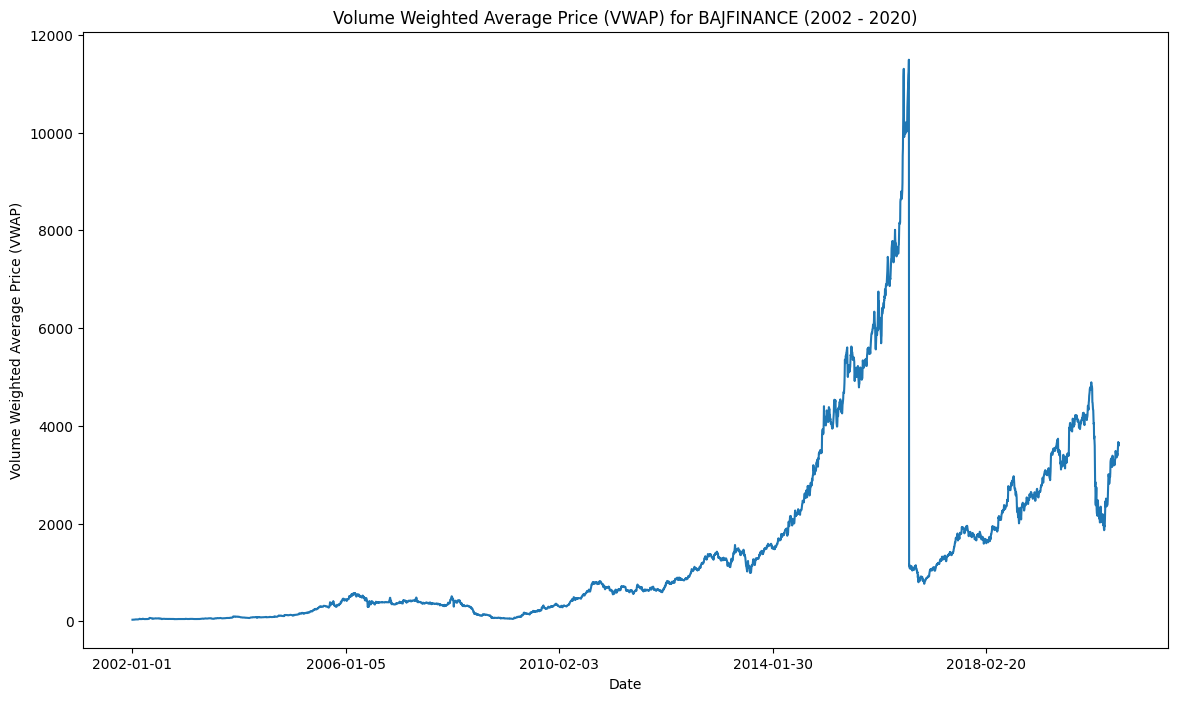

In [30]:
## plotting Volume Weighted Average Price (VWAP) to look at trend
df['VWAP'].plot(figsize=(14,8))
plt.title('Volume Weighted Average Price (VWAP) for BAJFINANCE (2002 - 2020)')
plt.xlabel('Date')
plt.ylabel('Volume Weighted Average Price (VWAP)')
plt.show()

We can observe a trend. 
Drop in 2008, likely due to global financial crisis?
High rise from 2014 to around 2016.
Huge Drop late 2017, interest rate rise?
Drop in 2020, Covid-19?